# Feature Engineering Team - EDA

In [1]:
# importing lib
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [2]:
df = pd.read_csv('Final-data.csv')

In [3]:
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,11,12,9,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,0


## Derived Feature - Final_Score

#### 30% weightage is given to period 1 and period 2 exam and 40% is given to final exam.
#### These weights have been based on correlations between G1, G2, G3, Final_Score.

In [4]:
weight_g1 = 0.3
weight_g2 = 0.3
weight_g3 = 0.4

In [5]:
df["Final_Score"] = (df['G1'] * weight_g1) + (df['G2'] * weight_g2) + (df['G3'] * weight_g3)
df["Final_Score"] = df["Final_Score"].round()
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject,Final_Score
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,1,1,3,6,5,6,6,1,6.0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,1,1,3,4,5,5,6,1,5.0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,2,3,3,10,7,8,10,1,8.0
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,1,1,5,2,15,14,15,1,15.0
4,4,GP,F,16,U,GT3,T,3,3,other,...,2,1,2,5,4,6,10,10,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,2,1,2,5,4,10,11,10,0,10.0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,4,1,1,1,4,15,15,16,0,15.0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,5,6,11,12,9,0,10.0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,5,3,4,2,6,10,10,10,0,10.0


In [6]:
df = df.drop(['Unnamed: 0','G1','G2','G3'], axis = 1)

In [7]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,1,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,1,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,1,8.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,1,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,0,10.0
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,0,15.0
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,0,10.0
1042,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,0,10.0


## Derived Feature - SES_Status

In [8]:
# Function to map socioeconomic status based on features which could affect ses
def get_ses_status_score(row):
    # Calculate the SES score based on relevant features
    ses_score = 0

    # Add points based on parents' education
    if row['Medu'] in ['0', '1']:
        ses_score += 1
    elif row['Medu'] == '2':
        ses_score += 2
    elif row['Medu'] == '3':
        ses_score += 3
    elif row['Medu'] == '4':
        ses_score += 4

    if row['Fedu'] in ['0', '1']:
        ses_score += 1
    elif row['Fedu'] == '2':
        ses_score += 2
    elif row['Fedu'] == '3':
        ses_score += 3
    elif row['Fedu'] == '4':
        ses_score += 4

    # Add points based on parents' occupation (Mother_job and Father_job)
    if row['Mjob'] in ['at_home', 'other']:
        ses_score += 1
    elif row['Mjob'] in ['teacher', 'health', 'services']:
        ses_score += 2

    if row['Fjob'] in ['at_home', 'other']:
        ses_score += 1
    elif row['Fjob'] in ['teacher', 'health', 'services']:
        ses_score += 2

    # Add points based on family size (famsize)
    if row['famsize'] == 'LE3':
        ses_score += 1
        
    # Add points based on address (Urban or Rural)
    if row['address'] == 'U':
        ses_score += 1

    # Add points based on Parents_status (Together or Apart)
    if row['Pstatus'] == 'T':
        ses_score += 1
        
    # Add points based on guardian
    if row['guardian'] in ['mother', 'father']:
        ses_score += 1
    elif row['guardian'] == 'other':
        ses_score += 2

    # Add points based on school_support, fam_support, paid_extra_classes, higher_edu, internet, and nursery
    if row['schoolsup'] == 'yes':
        ses_score += 1

    if row['famsup'] == 'yes':
        ses_score += 1

    if row['paid'] == 'yes':
        ses_score += 1

    if row['higher'] == 'yes':
        ses_score += 1

    if row['internet'] == 'yes':
        ses_score += 1

    if row['nursery'] == 'yes':
        ses_score += 1

    return ses_score

In [9]:
df['ses_score'] = df.apply(get_ses_status_score, axis=1)
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,1,6.0,8
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,1,5.0,8
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,8.0,11
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,1,15.0,12
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,1,9.0,9
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,1,15.0,12
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,1,12.0,9
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,1,6.0,9
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,1,18.0,11
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,1,15.0,10


In [10]:
# Calculate quartiles to derive threshold values
q1 = np.percentile(df['ses_score'], 25)
q2 = np.percentile(df['ses_score'], 50)  # Median
q3 = np.percentile(df['ses_score'], 75)

# Print the calculated quartiles
print("1st Quartile (25th percentile):", q1)
print("2nd Quartile (Median, 50th percentile):", q2)
print("3rd Quartile (75th percentile):", q3)

1st Quartile (25th percentile): 8.0
2nd Quartile (Median, 50th percentile): 9.0
3rd Quartile (75th percentile): 10.0


In [11]:
ses_array = []
ses_array = df['ses_score']
ses_array = set(ses_array)
ses_array

{5, 6, 7, 8, 9, 10, 11, 12, 13}

In [12]:
def get_ses_status_category(row):
    # Categorize SES score into 'Low', 'Medium', and 'High'
    if row['ses_score'] < 8:
        return 'Low'
    elif row['ses_score'] <= 10:
        return 'Medium'
    else:
        return 'High'

In [13]:
df['ses_status'] = df.apply(get_ses_status_category, axis=1)

In [14]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_score,ses_status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,1,6.0,8,Medium
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,1,5.0,8,Medium
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,1,8.0,11,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,1,15.0,12,High
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,1,9.0,9,Medium
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,1,15.0,12,High
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,1,12.0,9,Medium
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,1,6.0,9,Medium
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,1,18.0,11,High
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,1,15.0,10,Medium


In [15]:
#dropping the features used in calculating ses_status
df = df.drop(['address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
            'guardian','famsup','schoolsup', 'internet','paid','higher','nursery', 'ses_score'], axis = 1)

In [16]:
df['ses_status'].value_counts()

Medium    632
High      251
Low       161
Name: ses_status, dtype: int64

In [17]:
df.head(5)

,school,sex,age,reason,traveltime,studytime,failures,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_status
0,GP,F,18,course,2,2,0,no,no,4,3,4,1,1,3,6,1,6.0,Medium
1,GP,F,17,course,1,2,0,no,no,5,3,3,1,1,3,4,1,5.0,Medium
2,GP,F,15,other,1,2,3,no,no,4,3,2,2,3,3,10,1,8.0,High
3,GP,F,15,home,1,3,0,yes,yes,3,2,2,1,1,5,2,1,15.0,High
4,GP,F,16,home,1,2,0,no,no,4,3,2,1,2,5,4,1,9.0,Medium


## Derived Feature - avg_alc

In [18]:
#For alcohol let's consider categories:
#1 : very low
#2 : low
#3 : moderate
#4 : high
#5 : very high
df['avg_alc'] = (df['Dalc'] + df['Walc']) / 2

In [19]:
df.head(5)

,school,sex,age,reason,traveltime,studytime,failures,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_status,avg_alc
0,GP,F,18,course,2,2,0,no,no,4,3,4,1,1,3,6,1,6.0,Medium,1.0
1,GP,F,17,course,1,2,0,no,no,5,3,3,1,1,3,4,1,5.0,Medium,1.0
2,GP,F,15,other,1,2,3,no,no,4,3,2,2,3,3,10,1,8.0,High,2.5
3,GP,F,15,home,1,3,0,yes,yes,3,2,2,1,1,5,2,1,15.0,High,1.0
4,GP,F,16,home,1,2,0,no,no,4,3,2,1,2,5,4,1,9.0,Medium,1.5


In [20]:
#dropping the features used in calculating ses_status
df = df.drop(['Dalc', 'Walc'], axis = 1)

### Derived Feature - Social_Score

In [21]:
label = {'no': 0, 'yes': 1}
df['romantic'] = df['romantic'].map(label)

In [22]:
# Perform the ANOVA test for go out with friends vs. Final Score
goout_anova_result = f_oneway(
    df[df['goout'] == 1]['Final_Score'],
    df[df['goout'] == 2]['Final_Score'],
    df[df['goout'] == 3]['Final_Score'],
    df[df['goout'] == 4]['Final_Score'],
    df[df['goout'] == 5]['Final_Score']
)

# Perform the ANOVA test for family relationship vs. Final Score
fam_anova_result = f_oneway(
    df[df['famrel'] == 1]['Final_Score'],
    df[df['famrel'] == 2]['Final_Score'],
    df[df['famrel'] == 3]['Final_Score'],
    df[df['famrel'] == 4]['Final_Score'],
    df[df['famrel'] == 5]['Final_Score']
)

# Perform the ANOVA test for Romantic relationship vs. Final Score
rom_anova_result = f_oneway(
    df[df['romantic'] == 1]['Final_Score'],
    df[df['romantic'] == 0]['Final_Score'] 
)

In [23]:
print("ANOVA test result:")

# Print the ANOVA test result for go out with friends vs final score
print("go out with friend vs. Final Score:  F-statistic =", goout_anova_result.statistic, " p =", goout_anova_result.pvalue)

# Print the ANOVA test result for family relationship vs final score
print("family relationship vs. Final Score: F-statistic =", fam_anova_result.statistic, "p =", fam_anova_result.pvalue)

# Print the ANOVA test result for relationship vs final score
print("romantic relationship vs. Final Score:F-statistic =", rom_anova_result.statistic, "  p =", rom_anova_result.pvalue)


ANOVA test result:
go out with friend vs. Final Score:  F-statistic = 8.273167699778869  p = 1.4369456295221047e-06
family relationship vs. Final Score: F-statistic = 1.7828736587307605 p = 0.1299868897439774
romantic relationship vs. Final Score:F-statistic = 8.84918127133717   p = 0.002999795908015832


#### Going Out with Friends vs. Final Score:

#### F- statistic = 8.27316769
#### p-value (p) = 1.4369456295221047e-06
#### Interpretation: The small p-value (close to 0) indicates that there is a statistically significant difference in the means of the Final Score across different groups defined by the variable "go out with friend." In other words, "go out with friend" is likely to have a significant impact on the Final Score.

#### Family Relationships vs. Final Score:

#### F- statistic = 1.782873
#### p-value (p) = 0.129986
#### Interpretation: In this case, the p-value is greater than 0.05, indicating that there is no statistically significant difference in the means of the Final Score across different groups defined by the variable "family relationship." Therefore, the evidence does not support a significant impact of "family relationship" on the Final Score.


#### Romantic Relationship vs. Final Score:

#### F- statistic = 8.84918
#### p-value (p) = 0.0029997
#### Interpretation: The p-value is less than 0.05, indicating that there is a statistically significant difference in the means of the Final Score across different groups defined by the variable "romantic relationship." Thus, "romantic relationship" appears to have a significant impact on the Final Score.

In [24]:
def calculate_social_score(row):
    friends_weight = 0.5
    romantic_weight = 0.35
    family_weight = 0.15

    # Calculate the social score using weighted average
    social_score = (row['famrel'] * family_weight +
                    row['goout'] * friends_weight +
                    row['romantic'] * romantic_weight)

    # Round the social_score to the nearest integer and return it
    return int(round(social_score))

In [25]:
# Apply the function to create the 'social_score' feature in the DataFrame
df['social_score'] = df.apply(calculate_social_score, axis=1)

In [26]:
# Define the categories for 'social_score'
df['social_score_category'] = pd.cut(df['social_score'], bins=[0, 2, 3, 5], labels=['Very Bad', 'Neutral', 'Excellent'])

In [27]:
df = df.drop(['famrel', 'romantic', 'goout', 'social_score'], axis = 1)

In [28]:
df

,school,sex,age,reason,traveltime,studytime,failures,activities,freetime,health,absences,Subject,Final_Score,ses_status,avg_alc,social_score_category
0,GP,F,18,course,2,2,0,no,3,3,6,1,6.0,Medium,1.0,Neutral
1,GP,F,17,course,1,2,0,no,3,3,4,1,5.0,Medium,1.0,Very Bad
2,GP,F,15,other,1,2,3,no,3,3,10,1,8.0,High,2.5,Very Bad
3,GP,F,15,home,1,3,0,yes,2,5,2,1,15.0,High,1.0,Very Bad
4,GP,F,16,home,1,2,0,no,3,5,4,1,9.0,Medium,1.5,Very Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,course,1,3,1,yes,4,5,4,0,10.0,Low,1.5,Very Bad
1040,MS,F,18,course,1,2,0,no,3,1,4,0,15.0,High,1.0,Neutral
1041,MS,F,18,course,2,2,0,yes,1,5,6,0,10.0,Low,1.0,Very Bad
1042,MS,M,17,course,2,1,0,no,4,2,6,0,10.0,Medium,3.5,Neutral


In [29]:
df.to_csv('Preprocessed-Data.csv')

# ML Model Development

### Contributers:
#### 1. [Hari](https://github.com/haran2001)

# Classification 

In [31]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix  
from sklearn.naive_bayes import GaussianNB

In [32]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [33]:
def give_classification_merics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)  

    print('Accuracy score: ', accuracy)
    print('Precision score: ', precision)
    print('Recall score: ', recall)
    print('F1 score: ', f1)
    print('Confusion matrix: ')
    print(cm)
    
    return  accuracy, precision, recall, f1, cm

# Classification Preprocessing

In [34]:
df_train = pd.read_csv('data/train-student-mat.csv')
df_test = pd.read_csv('data/test-student-mat.csv')

In [35]:
df_train.head()

,Unnamed: 0,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Final_Score
0,1,1,GP,F,17,U,GT3,T,1,1,...,3,3,1,1,3,4,5,5,6,5.4
1,2,2,GP,F,15,U,LE3,T,1,1,...,3,2,2,3,3,10,7,8,10,8.5
2,4,4,GP,F,16,U,GT3,T,3,3,...,3,2,1,2,5,4,6,10,10,8.8
3,6,6,GP,M,16,U,LE3,T,2,2,...,4,4,1,1,3,0,12,12,11,11.6
4,8,8,GP,M,15,U,LE3,A,3,2,...,2,2,1,1,1,0,16,18,19,17.8


In [36]:
df_train.loc[df_train["Final_Score"] < 10, "Final_Score"] = 0
df_train.loc[df_train["Final_Score"] >= 10, "Final_Score"] = 1

In [37]:
df_test.loc[df_test["Final_Score"] < 10, "Final_Score"] = 0
df_test.loc[df_test["Final_Score"] >= 10, "Final_Score"] = 1

In [39]:
label_encoder = preprocessing.LabelEncoder()

df_train['school']= label_encoder.fit_transform(df_train['school'])
df_train['address']= label_encoder.fit_transform(df_train['address'])
df_train['Pstatus']= label_encoder.fit_transform(df_train['Pstatus'])
df_train['Medu']= label_encoder.fit_transform(df_train['Medu'])
df_train['Fedu']= label_encoder.fit_transform(df_train['Fedu'])
df_train['famsize']= label_encoder.fit_transform(df_train['famsize'])

df_train['sex']= label_encoder.fit_transform(df_train['sex'])
df_train['reason']= label_encoder.fit_transform(df_train['reason'])
df_train['activities']= label_encoder.fit_transform(df_train['activities'])
df_train['Mjob']= label_encoder.fit_transform(df_train['Mjob'])
df_train['Fjob']= label_encoder.fit_transform(df_train['Fjob'])
df_train['guardian']= label_encoder.fit_transform(df_train['guardian'])
df_train['schoolsup']= label_encoder.fit_transform(df_train['schoolsup'])
df_train['famsup']= label_encoder.fit_transform(df_train['famsup'])
df_train['paid']= label_encoder.fit_transform(df_train['paid'])
df_train['nursery']= label_encoder.fit_transform(df_train['nursery'])
df_train['higher']= label_encoder.fit_transform(df_train['higher']) 
df_train['internet']= label_encoder.fit_transform(df_train['internet']) 
df_train['romantic']= label_encoder.fit_transform(df_train['romantic']) 
df_train['Final_Score']= label_encoder.fit_transform(df_train['Final_Score'])

In [40]:
df_test['school']= label_encoder.fit_transform(df_test['school'])
df_test['address']= label_encoder.fit_transform(df_test['address'])
df_test['Pstatus']= label_encoder.fit_transform(df_test['Pstatus'])
df_test['Medu']= label_encoder.fit_transform(df_test['Medu'])
df_test['Fedu']= label_encoder.fit_transform(df_test['Fedu'])
df_test['famsize']= label_encoder.fit_transform(df_test['famsize'])

df_test['sex']= label_encoder.fit_transform(df_test['sex'])
df_test['reason']= label_encoder.fit_transform(df_test['reason'])
df_test['activities']= label_encoder.fit_transform(df_test['activities'])
df_test['Mjob']= label_encoder.fit_transform(df_test['Mjob'])
df_test['Fjob']= label_encoder.fit_transform(df_test['Fjob'])
df_test['guardian']= label_encoder.fit_transform(df_test['guardian'])
df_test['schoolsup']= label_encoder.fit_transform(df_test['schoolsup'])
df_test['famsup']= label_encoder.fit_transform(df_test['famsup'])
df_test['paid']= label_encoder.fit_transform(df_test['paid'])
df_test['nursery']= label_encoder.fit_transform(df_test['nursery'])
df_test['higher']= label_encoder.fit_transform(df_test['higher']) 
df_test['internet']= label_encoder.fit_transform(df_test['internet']) 
df_test['romantic']= label_encoder.fit_transform(df_test['romantic']) 
df_test['Final_Score']= label_encoder.fit_transform(df_test['Final_Score'])

In [41]:
x_train = df_train.drop(['Unnamed: 0', 'id', 'Final_Score', 'G1', 'G2', 'G3'], axis=1)
y_train = df_train['Final_Score']

x_test = df_test.drop(['Unnamed: 0', 'id', 'Final_Score', 'G1', 'G2', 'G3'], axis=1)
y_test = df_test['Final_Score']

# Classification: Naive Bayes 

In [47]:
from sklearn.preprocessing import PowerTransformer
Data_transformed = PowerTransformer().fit_transform(x_test)

In [48]:
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [49]:
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [50]:
y_pred = classifier.predict(Data_transformed)  

In [51]:
_ = give_classification_merics(y_test, y_pred)

Accuracy score:  0.7203389830508474
Precision score:  0.6744186046511628
Recall score:  0.9206349206349206
F1 score:  0.7785234899328859
Confusion matrix: 
[[27 28]
 [ 5 58]]


#  Classification: Random Forest 

In [52]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
from sklearn.preprocessing import StandardScaler    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split    

In [53]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [54]:
y_pred = classifier.predict(Data_transformed)  

In [55]:
_ = give_classification_merics(y_test, y_pred)

Accuracy score:  0.6271186440677966
Precision score:  0.6266666666666667
Recall score:  0.746031746031746
F1 score:  0.6811594202898551
Confusion matrix: 
[[27 28]
 [16 47]]


#  Classification: SVC

In [57]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(Data_transformed)

In [58]:
_ = give_classification_merics(y_test, y_pred)

Accuracy score:  0.711864406779661
Precision score:  0.6835443037974683
Recall score:  0.8571428571428571
F1 score:  0.7605633802816901
Confusion matrix: 
[[30 25]
 [ 9 54]]


# Hyperparameter Tuning (Random Forest)

In [65]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [66]:
%%time

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion = ['entropy', 'gini'] # F1 73
# criterion = ['gini'] # F1 70

# Create the random grid
random_grid = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
              }
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50]}
Wall time: 0 ns


In [67]:
%%time

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, random_state=42, n_jobs = -1, return_train_score=True)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Wall time: 37.8 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 14, 18, 23, 27, 32,
                                                         36, 41, 45, 50]},
                   random_state=42, return_train_score=True, verbose=2)

In [68]:
%%time
rf_random.best_params_

Wall time: 0 ns


{'n_estimators': 36,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': True}

In [69]:
%%time
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
_ = give_classification_merics(y_test, base_model.predict(x_test))

Accuracy score:  0.6779661016949152
Precision score:  0.6865671641791045
Recall score:  0.7301587301587301
F1 score:  0.7076923076923077
Confusion matrix: 
[[34 21]
 [17 46]]
Wall time: 29 ms


In [70]:
%%time
best_random = rf_random.best_estimator_
_ = give_classification_merics(y_test, best_random.predict(x_test))

Accuracy score:  0.652542372881356
Precision score:  0.6222222222222222
Recall score:  0.8888888888888888
F1 score:  0.7320261437908496
Confusion matrix: 
[[21 34]
 [ 7 56]]
Wall time: 9 ms


In [71]:
# Best Random Parameters: SVC

# {'n_estimators': 32,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'sqrt',
#  'max_depth': 20,
#  'criterion': 'entropy',
#  'bootstrap': True}

In [72]:
%%time

param_grid = {
    'n_estimators': [22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['sqrt'],
    'max_depth': [17, 18, 19, 20, 21, 22, 23],
    'criterion': ['entropy'],
    'bootstrap': [True]
}


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

Wall time: 0 ns


In [73]:
%%time
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 2156 candidates, totalling 6468 fits
Wall time: 1min 19s


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 22}

In [74]:
%%time
best_grid = grid_search.best_estimator_
_ = give_classification_merics(y_test, best_grid.predict(x_test))

Accuracy score:  0.6864406779661016
Precision score:  0.6444444444444445
Recall score:  0.9206349206349206
F1 score:  0.7581699346405228
Confusion matrix: 
[[23 32]
 [ 5 58]]
Wall time: 8 ms


# Hyperparameter Tuning (SVC)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# train the model on train set
model = svm.SVC()
model.fit(x_train, y_train)
  
# print prediction results
predictions = model.predict(x_test)
_ = give_classification_merics(y_test, predictions)

Accuracy score:  0.652542372881356
Precision score:  0.625
Recall score:  0.873015873015873
F1 score:  0.728476821192053
Confusion matrix: 
[[22 33]
 [ 8 55]]


In [77]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.509 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.589 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.691 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.527 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [78]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [79]:
grid_predictions = grid.predict(x_test)

In [80]:
_ = give_classification_merics(y_test, grid_predictions)

Accuracy score:  0.6779661016949152
Precision score:  0.6288659793814433
Recall score:  0.9682539682539683
F1 score:  0.7624999999999998
Confusion matrix: 
[[19 36]
 [ 2 61]]


# Hyperparamteter Tuning (Naive Bayes) 

In [81]:
# Refererence: https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning

In [82]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

In [83]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [84]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [85]:
model = GaussianNB()

In [86]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [87]:
# Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.
# Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed. 
# By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.

gs_NB.best_params_

{'var_smoothing': 0.1873817422860384}

In [88]:
gs_NB.best_score_

0.7138888888888889

# Final Classification: Naive Bayes 

In [89]:
Data_transformed = PowerTransformer().fit_transform(x_test)

In [90]:
classifier = GaussianNB(var_smoothing = 0.1873817422860384)  
classifier.fit(x_train, y_train)  

GaussianNB(var_smoothing=0.1873817422860384)

In [91]:
y_pred = classifier.predict(Data_transformed)  

In [92]:
_ = give_classification_merics(y_test, y_pred)

Accuracy score:  0.711864406779661
Precision score:  0.6666666666666666
Recall score:  0.9206349206349206
F1 score:  0.7733333333333333
Confusion matrix: 
[[26 29]
 [ 5 58]]


#  Final Classification: Random Forest 

In [93]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
from sklearn.preprocessing import StandardScaler    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split    

In [94]:
# classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier= RandomForestClassifier(bootstrap=True,
 criterion = 'entropy',
 max_depth = 23,
 max_features = 'sqrt',
 min_samples_leaf = 4,
 min_samples_split = 4,
 n_estimators = 26)

In [95]:
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', max_depth=23, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=26)

In [96]:
y_pred = classifier.predict(Data_transformed)  

In [97]:
_ = give_classification_merics(y_test, y_pred)

Accuracy score:  0.6440677966101694
Precision score:  0.6206896551724138
Recall score:  0.8571428571428571
F1 score:  0.7200000000000001
Confusion matrix: 
[[22 33]
 [ 9 54]]


#  Final Classification: SVC

In [98]:
#Import svm model
from sklearn import svm

In [99]:
#Create a svm Classifier
clf = svm.SVC(C = 100, gamma = 0.0001, kernel = 'rbf') # Linear Kernel

In [100]:
#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [101]:
_ = give_classification_merics(y_test, y_pred)

Accuracy score:  0.6779661016949152
Precision score:  0.6288659793814433
Recall score:  0.9682539682539683
F1 score:  0.7624999999999998
Confusion matrix: 
[[19 36]
 [ 2 61]]


# Feature Importance:

In [201]:
import matplotlib.pyplot as plt

In [188]:
feature_imp = df_train.copy()
feature_imp = feature_imp.drop(['Unnamed: 0','G1','G2','G3'], axis = 1)
feature_imp = abs(feature_imp.corr()['Final_Score'])
feature_imp = feature_imp.sort_values()

In [197]:
type(feature_imp)

pandas.core.series.Series

In [198]:
keys = feature_imp.keys()
values = feature_imp.values

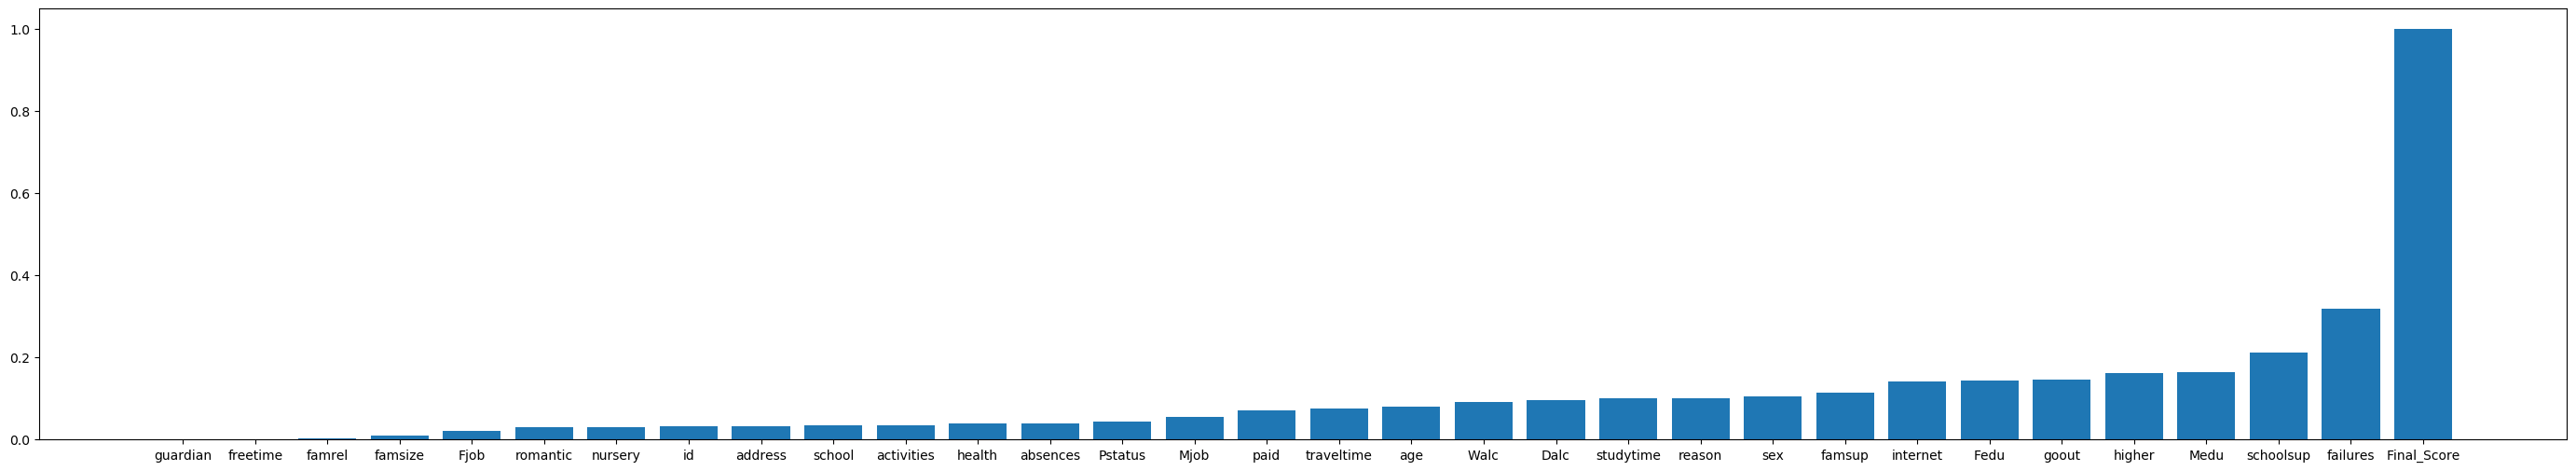

In [200]:
f, ax = plt.subplots(figsize=(35,6))
pyplot.bar(keys, abs(values))
pyplot.show()